### Introduction
In this notebook we will be analysing the PCA commponancts of the Mnist dataset and seeing how only using the first N in training our model affects accuracy

#### Import Modules

In [1]:
import tensorflow as tf
import numpy as np
import scipy as sp
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from scipy import linalg

#### Task 1 
Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)

#### Load the MNIST Data set
The following code in training the Mnist Dataset was sourced from my week 4 part one notebook

This image is a 0


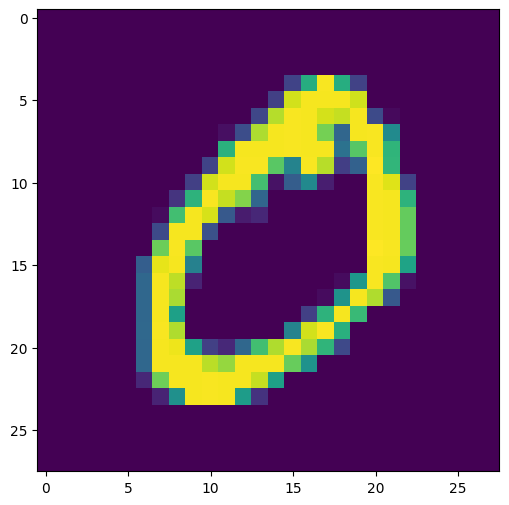

In [2]:
mnist = keras.datasets.mnist  #mnist data set
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() #load data
#normalise the data over max pixel value 255
train_images = train_images/255
test_images = test_images/255

#### reshape images for CNN
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# one hot encode the labels
#notice num_classes is set to 10 as we have 10 different labels
test_labels = to_categorical(test_labels, num_classes=10)
train_labels = to_categorical(train_labels, num_classes=10)

#### plot a test image
plt.figure(figsize=(10,6))
plt.imshow(train_images[1])

#### what label is this
print(f'This image is a {np.argmax((train_labels[1]))}')

#### Create a single layer CNN

In [34]:
def Single_Layer_CNN(train_images, train_labels, test_images, test_labels, kernal_size, pool_size, no_kernals):
    '''This function creates a singnle layer CNN network and evaluates it using the given hyperparameters for the layers
    it then return the model itself and its performance metrics'''

    # Define model architecture
    model = keras.models.Sequential([
            keras.layers.Conv2D(no_kernals, (kernal_size, kernal_size), activation='relu', input_shape=(28, 28, 1)), #convolution layyer
            keras.layers.MaxPooling2D((pool_size, pool_size)), #pool layer
            keras.layers.Flatten(),
            keras.layers.Dense(32, activation='relu'), #dense layer
            keras.layers.Dropout(0.4), #dropout later
            keras.layers.Dense(10, activation='softmax') #softmax output
    ])

    # Compile model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #we are using categprcal cross entropy as we have onehot encoded the labels
                  metrics=['accuracy'])

    # Fit model
    history = model.fit(train_images, train_labels, epochs=15, batch_size=256,  
                        validation_data=(test_images, test_labels), verbose=2)
    model.summary()

    return history, model

#### Train Model

In [35]:
history,model = Single_Layer_CNN(train_images,train_labels,test_images,test_labels,kernal_size=7,pool_size=4,no_kernals=32)

Epoch 1/15
235/235 - 1s - loss: 0.8359 - accuracy: 0.7300 - val_loss: 0.1805 - val_accuracy: 0.9536 - 1s/epoch - 5ms/step
Epoch 2/15
235/235 - 1s - loss: 0.3281 - accuracy: 0.9010 - val_loss: 0.1034 - val_accuracy: 0.9685 - 534ms/epoch - 2ms/step
Epoch 3/15
235/235 - 1s - loss: 0.2401 - accuracy: 0.9297 - val_loss: 0.0799 - val_accuracy: 0.9762 - 535ms/epoch - 2ms/step
Epoch 4/15
235/235 - 1s - loss: 0.2052 - accuracy: 0.9384 - val_loss: 0.0674 - val_accuracy: 0.9802 - 556ms/epoch - 2ms/step
Epoch 5/15
235/235 - 1s - loss: 0.1834 - accuracy: 0.9451 - val_loss: 0.0638 - val_accuracy: 0.9805 - 533ms/epoch - 2ms/step
Epoch 6/15
235/235 - 1s - loss: 0.1691 - accuracy: 0.9481 - val_loss: 0.0562 - val_accuracy: 0.9838 - 534ms/epoch - 2ms/step
Epoch 7/15
235/235 - 1s - loss: 0.1546 - accuracy: 0.9530 - val_loss: 0.0554 - val_accuracy: 0.9833 - 533ms/epoch - 2ms/step
Epoch 8/15
235/235 - 1s - loss: 0.1485 - accuracy: 0.9541 - val_loss: 0.0455 - val_accuracy: 0.9854 - 535ms/epoch - 2ms/step
Epo

#### Task 2 
Decompose the MNIST training dataset into its PCA components
- we define a function to transform the given mnist images into its pca componants
- we start by contructing the covariance matrix then fiunding all the eigenvalues and eigen vectors

In [36]:
#### This code was written using Prof. Ryan Nichol's Week5_PCA notebook
#### https://github.com/nichol77/mlForPhysicists/blob/master/Week5/Week5_PCA.ipynb

X = train_images.reshape(60000,784) #reshape into flattened vectors 

#### construct covariance matrix
mean = np.mean(X) #mean
x = X - mean  #centre data on mean
xtest = test_images.reshape(-1,28*28)
rho=np.cov(x,rowvar=False) #convariance matrix

#### Get Eigenvalues and Eigenvectors
vals,vecs = linalg.eigh(rho)  #eigenvalues,eigenvectors

#flip so we get eigenvalues with corresponding eigen vectors in descending order
vecs=np.flip(vecs)
vals=np.flip(vals)

#### Check shape of all 
print("train_images.shape: ",np.shape(train_images))
print("X.shape:",np.shape(X))    
print("rho.shape:",np.shape(rho))
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))

train_images.shape:  (60000, 28, 28, 1)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


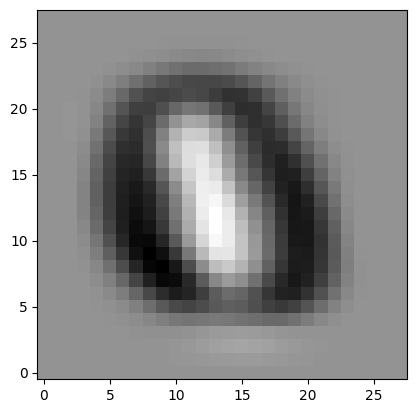

In [37]:
#### Plot the first PC image
fig,ax=plt.subplots()
ax.imshow(np.reshape(vecs[:,0],[28,28]), origin='lower',cmap='binary',interpolation='nearest')

You can see that this is the first PC of the first image , this also is consistant with the notebook exampllar

#### Plot the first 6 PC componants
- this code was adapted from Prof. Ryan Nichol's week 5 PCA notebook

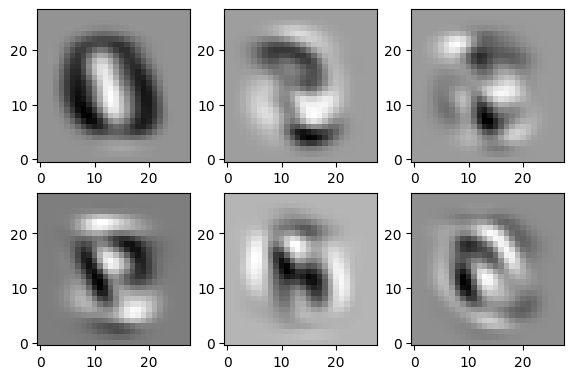

In [7]:
fig,ax=plt.subplots(2,3) #plot 6 sublots
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(np.reshape(vecs[:,(i+j*3)],[28,28]), origin='lower',cmap='binary',interpolation='nearest')
plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)  #Adjust the space between the subplots so there isn't acres of whitespace

#### Task 3 
Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITOUT RETRAINING THE NETWORK*
- to do this we will use a function that will evaluate the model on a range of N values which is at max 784
-  and a function that can take an image and split it into its PC 

In [38]:
def PC_Decomp(N,x_centred,vecs,mean):
    ''' This functiont takes the centred training images and outputs the image considering the first N Principal componants 
        the image is then reshaped so it is compatible with the earlier defined model'''
    P = np.dot(x_centred,vecs)  #dot product
    PC_img = (np.dot((P[:,0:N]),vecs.T[0:N,:] )) + mean  #reconstruct image with N PC
    PC_img = PC_img.reshape((-1, 28, 28, 1))  #reshape to use in model
    return PC_img

In [39]:
def Test_Model_N_best(model,xtest,vecs,mean):
    ''' This function takes a predefined model and tests it on various N decompositions of the test set
        the accuracy per N value is then plotted for the test set 
        '''
    # make array bottom heavy
    N_1 = np.linspace(1,100,15).astype(int) # N values integers
    N_2 = np.linspace(101,784,15).astype(int) # N values integers
    N_values = np.concatenate((N_1,N_2))  #combine arrays
    accuracy = np.zeros(shape=N_values.shape) #ermpty accuracy array
    for i,N in enumerate(N_values):
        new_test_img = PC_Decomp(N,xtest,vecs,mean) #decomp the test img 
        test_loss,test_acc = model.evaluate(new_test_img,test_labels) #evaluate the test img on label
        accuracy[i] = test_acc

    #### plot test accuracy against no N
    plt.figure(figsize=(10,6))
    plt.plot(N_values,accuracy)
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Test Accuracy')
    plt.title('Model Test Accuracy vs Number of PCA Components')
    plt.grid(True)
    plt.show()    

#### Check if PC_Decomp Works as intended 

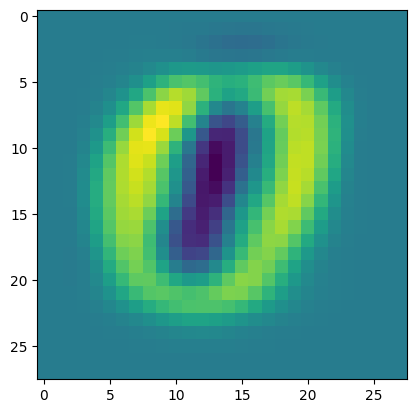

In [40]:
pca_img0 = PC_Decomp(1,x,vecs,mean)
plt.imshow(pca_img0[0])    

This looks consistent as expected by previous notebook results

313/313 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9665


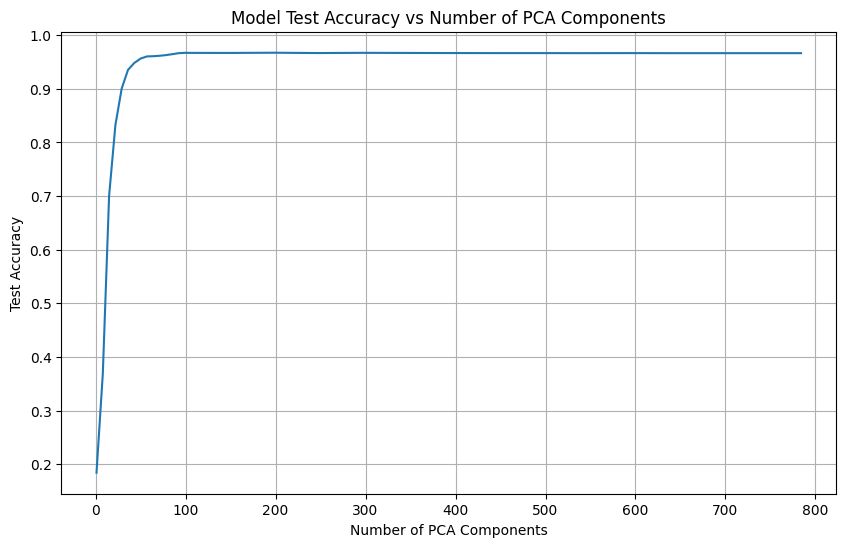

In [11]:
Test_Model_N_best(model=model,xtest=xtest,vecs=vecs,mean=mean)

You  Can see from this graph that as the number of PCA compponants increases the test accuracy increases to a point but then plateaus to around `96.65%`, you can see clearly that the data can basically be run in the first 100 PC as after that there is almost no loss , this  graphs shows clearly how dimesntionality has been reduced to only the most integral parts of the images

####  Task 4
Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1)

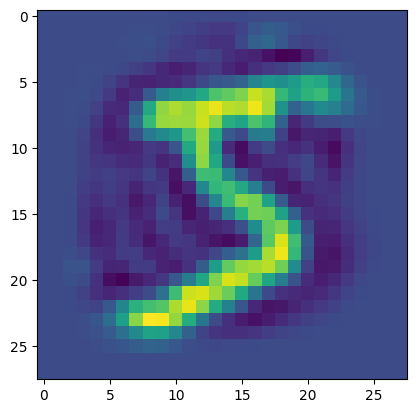

In [20]:
#### New Dataset 100 componants
new_training_x = PC_Decomp(100,x,vecs,mean)
#### show 100 PC of first image
plt.imshow(new_training_x[0])

#### Train new model using 100 pca 

In [21]:
history,model_pca_100 = Single_Layer_CNN(new_training_x,train_labels,test_images,test_labels,kernal_size=7,pool_size=4,no_kernals=32)

Epoch 1/15
235/235 [==============================] - 1s 4ms/step - loss: 0.7535 - accuracy: 0.7689 - val_loss: 0.1616 - val_accuracy: 0.9573
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9135 - val_loss: 0.0995 - val_accuracy: 0.9709
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.2226 - accuracy: 0.9330 - val_loss: 0.0820 - val_accuracy: 0.9742
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1923 - accuracy: 0.9427 - val_loss: 0.0669 - val_accuracy: 0.9802
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1714 - accuracy: 0.9481 - val_loss: 0.0599 - val_accuracy: 0.9796
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9519 - val_loss: 0.0539 - val_accuracy: 0.9830
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1475 - accuracy: 0.9544 - val_loss: 0.0520 - val_accuracy: 0.9839
Epoch 

#### Test differnt N values for new model

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9689


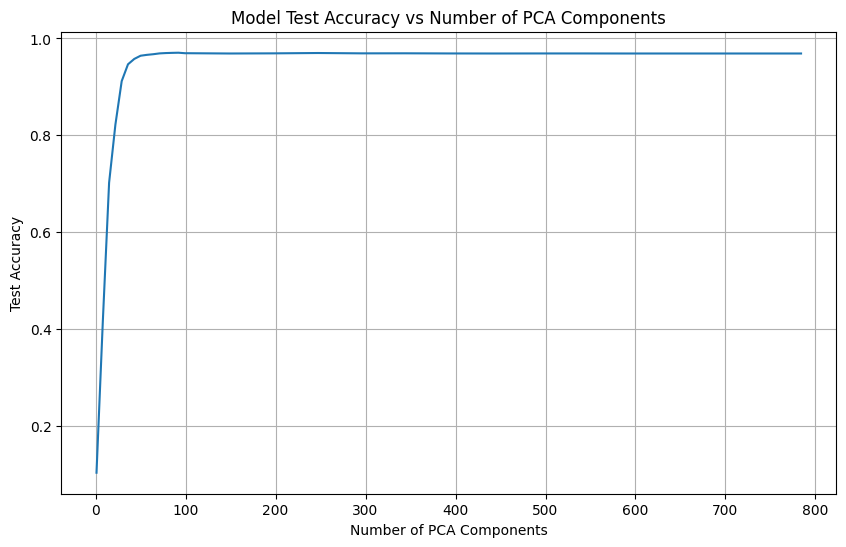

In [22]:
Test_Model_N_best(model=model_pca_100,xtest=xtest,vecs=vecs,mean=mean)

You can see clearly here after we only trained the model on a trianing set of the first 100 PC the model accuracy hit the plateau quicker , this is beacuse the modeol training set was deccomposed into its most principlal parts , compared to training the data on all the princiapl compoannts compared the 100 of them the model that was trained on the first 100 actually had a higher test accuracy in general comsidering the value of the plataeu

#### Step 6
Finally repeat steps 4 and 5 using a network trained with the best 20 components


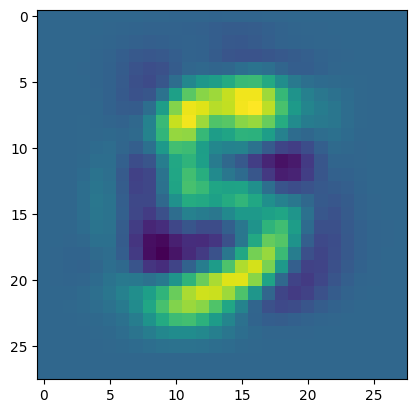

In [26]:
#### New Dataset 100 componants
new_training_x_20 = PC_Decomp(20,x,vecs,mean)
#### show 100 PC of first image
plt.imshow(new_training_x_20[0])

In [27]:
history,model_pca_20 = Single_Layer_CNN(new_training_x_20,train_labels,test_images,test_labels,kernal_size=7,pool_size=4,no_kernals=32)

Epoch 1/15
235/235 [==============================] - 1s 4ms/step - loss: 1.0015 - accuracy: 0.6723 - val_loss: 0.3667 - val_accuracy: 0.8983
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.5204 - accuracy: 0.8321 - val_loss: 0.3219 - val_accuracy: 0.9033
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8635 - val_loss: 0.3212 - val_accuracy: 0.9021
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8755 - val_loss: 0.2881 - val_accuracy: 0.9113
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.8856 - val_loss: 0.2927 - val_accuracy: 0.9103
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8924 - val_loss: 0.3370 - val_accuracy: 0.8967
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8982 - val_loss: 0.3250 - val_accuracy: 0.9010
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.9106


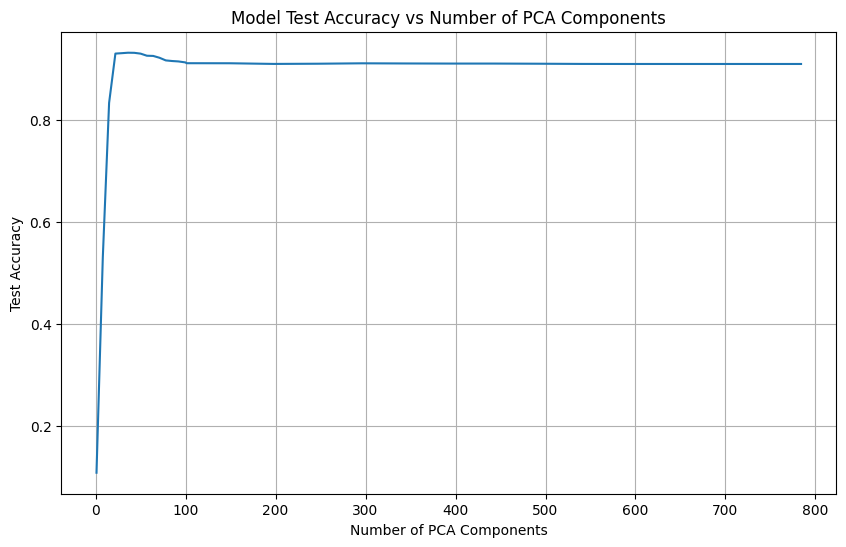

In [31]:
Test_Model_N_best(model_pca_20,xtest,vecs,mean)

When the model was trained on the first 20 pricpal componants you can see that the average test accuract coopared to the other graphs is significantly lower , you could argue this to be the case as the first 20 PC are not neough to caputreu the intricacies of the data , the data as you can see clearly by the stepp 6 image is very low quality which has afffected the test score .

#### Conclusion
It is important to realise that when decomposing an image into its PC, you have to evaluate to what point N are overarching intricacies of the data are captured and to have the balance of maximising the deimenssionality reduction to amke the data easier to process whilsrt also making sure the main parts of the data are capturd 